# Utility vs. alpha

Results are produced by executing script **alphas.sh** and they are presented in Figure 1. 

In [1]:
import os
os.chdir("../../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import glob
import json
from lib import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

Set the variable *datas* to *credit* to plot the results for the *credit* datasset or *fico* for the *lending* dataset.  

In [3]:
name="alphas"
datas="fico"
final_df = []
cols = sns.color_palette("husl",5)

col_dict = {"Black box": cols[0],
            "Minimum cost": cols[1],
            "Diverse": cols[2],
            "Algorithm 1": cols[3],
            "Algorithm 2": cols[4]
           }

mark_dict = {"Black box": 'o',
            "Minimum cost": '^',
            "Diverse": 'D',
            "Algorithm 1": 's',
            "Algorithm 2": 'v'
           }

style_dict = {"Black box": '-',
            "Minimum cost": '--',
            "Diverse": '-.',
            "Algorithm 1": ':',
            "Algorithm 2": '--'
           }

In [4]:
files = glob.glob("./outputs/counterfactuals/{name}_mincost_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))

df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [5]:
files = glob.glob("./outputs/counterfactuals/{name}_maxcover_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [6]:
files = glob.glob("./outputs/counterfactuals/{name}_greedydet_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [7]:
files = glob.glob("./outputs/counterfactuals/{name}_greedyrand_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time","alpha","best_responses","pi"], var_name="algorithm", value_name="utility"))

In [8]:
df = pd.concat(final_df)

In [9]:
df['algorithm'] = df['algorithm'].str.replace("min_cost", "Minimum cost")
df['algorithm'] = df['algorithm'].str.replace("max_cover", "Diverse")
df['algorithm'] = df['algorithm'].str.replace("non_strategic", "Black box")
df['algorithm'] = df['algorithm'].str.replace("strategic", "Algorithm 1")
df['algorithm'] = df['algorithm'].str.replace("greedy_rand", "Algorithm 2")

In [10]:
df['algorithm'].unique()

array(['Minimum cost', 'Diverse', 'Algorithm 1', 'Black box',
       'Algorithm 2'], dtype=object)

In [11]:
df['alpha'] = (1/df['alpha']*100).astype(int)

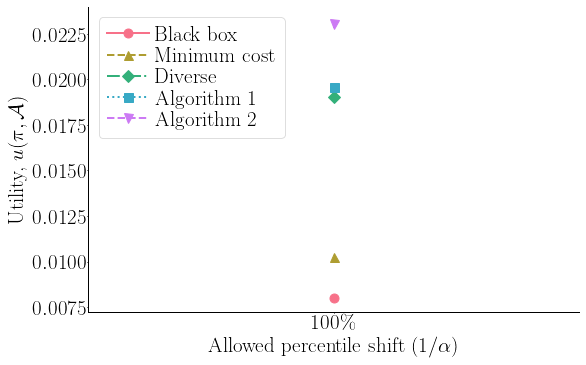

In [12]:
utils.latexify(8.8,5.5, font_scale=3.0)
lines={}
algorithms=["Black box", "Minimum cost", "Diverse", "Algorithm 1", "Algorithm 2"]
alphas=df['alpha'].unique()
for alg in algorithms:
    lines[alg]=[]
    for x_val in alphas:
        line_l=pd.DataFrame(df[(df['algorithm']==alg) & (df['alpha']==x_val)], columns=['utility']).values.tolist()
        lines[alg].append((x_val,np.mean(line_l),np.std(line_l)))

ax=plt.subplot(111)
for alg in algorithms:
    line_sorted=sorted(lines[alg], key=lambda x:x[0])
    x_vals=[x[0] for x in line_sorted]
    y_vals=[x[1] for x in line_sorted]
    y_err=[x[2] for x in line_sorted]
    if alg=='Algorithm 2':
        ax.errorbar(x_vals, y_vals, yerr=y_err, linestyle=style_dict[alg], label=alg, marker=mark_dict[alg], markersize=9, color=col_dict[alg], linewidth=2)
    else:
        ax.plot(x_vals, y_vals, linestyle=style_dict[alg], marker=mark_dict[alg], label=alg, markersize=9, color=col_dict[alg], linewidth=2)

handles,_ = ax.get_legend_handles_labels()
handles[4] = handles[4][0]
plt.legend(handles, algorithms, shadow=None, loc=2, labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Utility, $u(\\pi,\\mathcal{A})$")
plt.xlabel("Allowed percentile shift ($1/\\alpha$)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
temp = plt.xticks(ticks=x_vals, labels=[str(x)+'\%' for x in x_vals])
plt.savefig("./figures/counterfactuals/{name}_{datas}_comp.pdf".format(name=name, datas=datas),bbox_inches='tight', )